## Importación de librerías

In [61]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [62]:
df_houses = pd.read_csv(r"C:\Users\apico\OneDrive\Escritorio\MACHINE LEARNING\PRACTICAS\REGRESION LINEAL\house_prices.csv")
df_houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Estudio del conjunto de datos

In [63]:
columnas_numericas = df_houses.select_dtypes(include=['int', 'float'])

# Seleccionar columnas no numéricas
columnas_no_numericas = df_houses.select_dtypes(exclude=['int', 'float'])

# Imprimir los resultados
print(f"Columnas numéricas: {columnas_numericas}")

print(f"Columnas no numéricas: {columnas_no_numericas}")


Columnas numéricas:         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003  

### COLUMNAS NO NUMÉRICAS

In [64]:
# Calculamos el porcentaje de valores repetidos que hay en cada columna para comprobar lo representativas que son.

porcentaje_umbral = 0.9

num_filas = columnas_no_numericas.shape[0]

for columna in columnas_no_numericas.columns:
    
    # Obtener la cuenta de cada valor en la columna
    cuenta_valores = columnas_no_numericas[columna].value_counts(dropna=False)
    
    # Calcular el porcentaje de repetición de cada valor
    porcentaje_repetido = cuenta_valores / num_filas
    
    # Filtrar los valores que superen el umbral
    valores_repetidos = porcentaje_repetido[porcentaje_repetido > porcentaje_umbral]
    
    # Imprimir los resultados si hay valores repetidos
    if not valores_repetidos.empty:
        print("Columna:", columna)
        print(valores_repetidos)
        print()

Columna: Street
Pave    0.99589
Name: Street, dtype: float64

Columna: Alley
NaN    0.937671
Name: Alley, dtype: float64

Columna: Utilities
AllPub    0.999315
Name: Utilities, dtype: float64

Columna: LandSlope
Gtl    0.946575
Name: LandSlope, dtype: float64

Columna: Condition2
Norm    0.989726
Name: Condition2, dtype: float64

Columna: RoofMatl
CompShg    0.982192
Name: RoofMatl, dtype: float64

Columna: Heating
GasA    0.978082
Name: Heating, dtype: float64

Columna: CentralAir
Y    0.934932
Name: CentralAir, dtype: float64

Columna: Electrical
SBrkr    0.913699
Name: Electrical, dtype: float64

Columna: Functional
Typ    0.931507
Name: Functional, dtype: float64

Columna: GarageCond
TA    0.908219
Name: GarageCond, dtype: float64

Columna: PavedDrive
Y    0.917808
Name: PavedDrive, dtype: float64

Columna: PoolQC
NaN    0.995205
Name: PoolQC, dtype: float64

Columna: MiscFeature
NaN    0.963014
Name: MiscFeature, dtype: float64



In [65]:
# Eliminamos columnas no representativas

columnas_a_eliminar = []

for columna in columnas_no_numericas.columns:
    
    # Obtener la cuenta de cada valor en la columna, incluyendo nulos o NaN
    cuenta_valores = columnas_no_numericas[columna].value_counts(dropna=False)
    
    # Calcular el porcentaje de repetición de cada valor, incluyendo nulos o NaN
    porcentaje_repetido = cuenta_valores / num_filas
    
    # Verificar si alguno de los valores supera el umbral, excluyendo nulos o NaN
    if any((porcentaje_repetido > porcentaje_umbral) & (~pd.isnull(porcentaje_repetido))):
        columnas_a_eliminar.append(columna)

columnas_no_numericas1 = columnas_no_numericas.drop(columnas_a_eliminar, axis=1)

# Imprimir el DataFrame resultante
print(columnas_no_numericas1)


     MSZoning LotShape LandContour LotConfig Neighborhood Condition1 BldgType  \
0          RL      Reg         Lvl    Inside      CollgCr       Norm     1Fam   
1          RL      Reg         Lvl       FR2      Veenker      Feedr     1Fam   
2          RL      IR1         Lvl    Inside      CollgCr       Norm     1Fam   
3          RL      IR1         Lvl    Corner      Crawfor       Norm     1Fam   
4          RL      IR1         Lvl       FR2      NoRidge       Norm     1Fam   
...       ...      ...         ...       ...          ...        ...      ...   
1455       RL      Reg         Lvl    Inside      Gilbert       Norm     1Fam   
1456       RL      Reg         Lvl    Inside       NWAmes       Norm     1Fam   
1457       RL      Reg         Lvl    Inside      Crawfor       Norm     1Fam   
1458       RL      Reg         Lvl    Inside        NAmes       Norm     1Fam   
1459       RL      Reg         Lvl    Inside      Edwards       Norm     1Fam   

     HouseStyle RoofStyle E

In [66]:
# Pasamos a lista todas las columnas categóricas

columnas_no_numericas_list = columnas_no_numericas1.columns.tolist()

# Aplicar One-Hot Encoding a las columnas categóricas

df_encoded = pd.get_dummies(columnas_no_numericas1, columns=columnas_no_numericas_list)

df_encoded

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### COLUMNAS NUMÉRICAS

In [67]:
# Normalizamos los datos escalandalos entre -1 a 1.

scaler = MinMaxScaler(feature_range=(-1, 1))
df_houses1 = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)

# Imprimir el DataFrame normalizado
df_houses1.head()



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.000000,-0.529412,-0.698630,-0.933160,0.333333,0.00,0.898551,0.766667,-0.7550,-0.749823,...,-1.000000,-0.776965,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.818182,0.0,-0.517845
1,-0.998629,-1.000000,-0.595890,-0.922410,0.111111,0.75,0.507246,-0.133333,-1.0000,-0.653437,...,-0.304551,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.272727,-0.5,-0.592834
2,-0.997258,-0.529412,-0.678082,-0.906985,0.333333,0.00,0.869565,0.733333,-0.7975,-0.827782,...,-1.000000,-0.846435,-1.000000,-1.0,-1.0,-1.0,-1.0,0.454545,0.0,-0.476184
3,-0.995888,-0.411765,-0.732877,-0.922877,0.333333,0.00,-0.376812,-0.333333,-1.0000,-0.923459,...,-1.000000,-0.872029,-0.014493,-1.0,-1.0,-1.0,-1.0,-0.818182,-1.0,-0.708096
4,-0.994517,-0.529412,-0.568493,-0.878847,0.555556,0.00,0.855072,0.666667,-0.5625,-0.767895,...,-0.551925,-0.692870,-1.000000,-1.0,-1.0,-1.0,-1.0,1.000000,0.0,-0.402583


<Axes: >

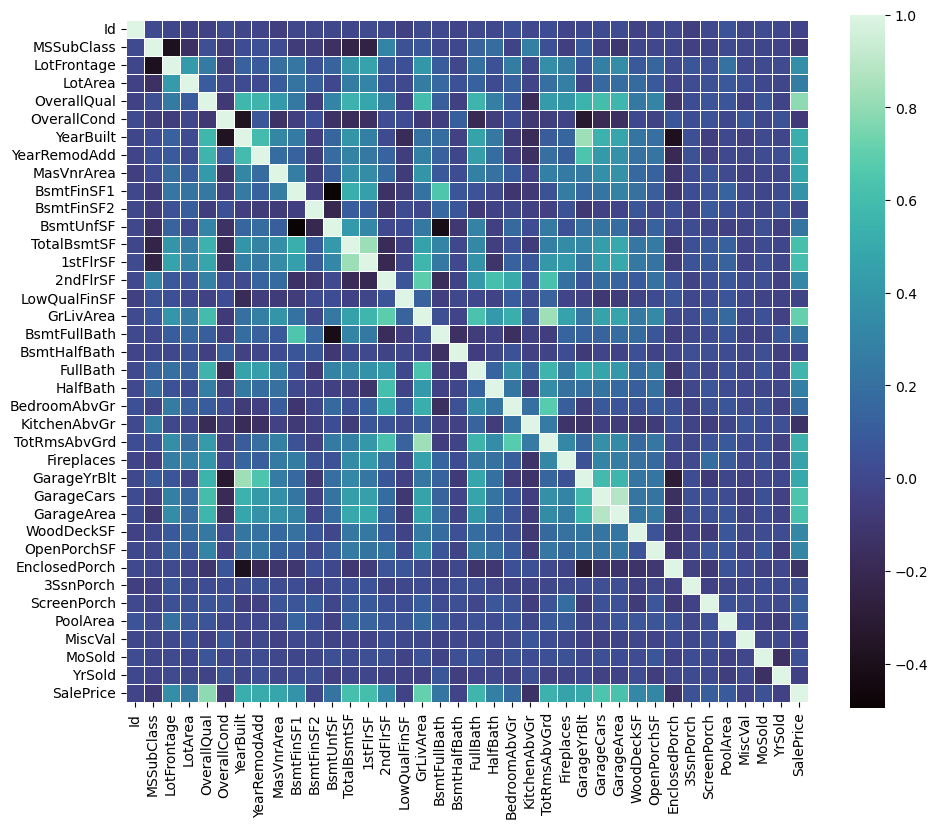

In [68]:
# Estudiamos la correlación

corr= df_houses1.corr()

f,ax, = plt.subplots(figsize=(11,9))

sns.heatmap(corr, cmap='mako', square=True, linewidths=.5)

### Prepocesamiento de datos

#### Selección de datos

In [84]:
# Definimos variables puestas a estudio

X = df_houses1[['TotalBsmtSF','OverallQual']] 
Y = df_houses1['SalePrice'] 


#### Visualización de los datos

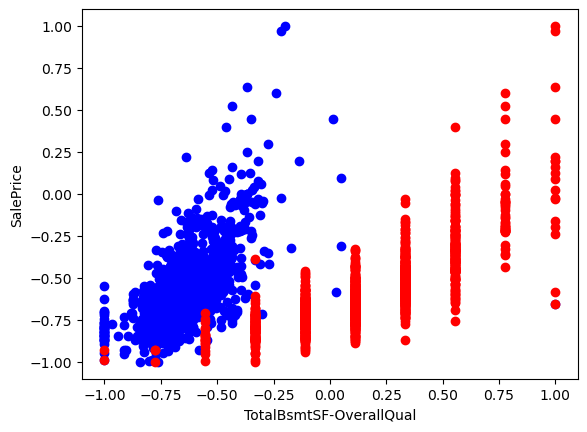

In [85]:
# Visualizamos los datos

plt.scatter(X['TotalBsmtSF'], Y, color='blue', label='Variable 1')
plt.scatter(X['OverallQual'], Y, color='red', label='Variable 2')
plt.xlabel('TotalBsmtSF-OverallQual')
plt.ylabel('SalePrice')
plt.show()

#### Identificación y eliminación de valores atípicos

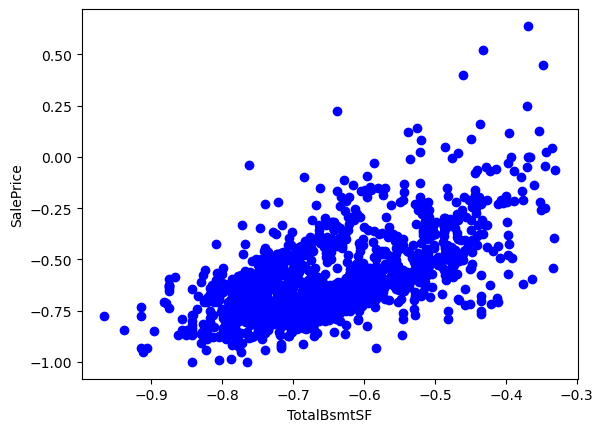

In [71]:
# Calcular el rango intercuartílico (IQR)

Q1 = df_houses1['TotalBsmtSF'].quantile(0.25)
Q3 = df_houses1['TotalBsmtSF'].quantile(0.75)
IQR = Q3 - Q1

# Definir el límite superior e inferior para identificar valores atípicos

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Eliminar los valores atípicos del DataFrame

df_sin_outliers = df_houses1[((df_houses1['TotalBsmtSF'] >= limite_inferior) & (df_houses1['TotalBsmtSF'] <= limite_superior))]

# Renombramos las variables con el DF sin los valores atípicos

X = df_sin_outliers[['TotalBsmtSF']] 
Y = df_sin_outliers['SalePrice'] 

# Visualizamos los datos de nuevo 

plt.scatter(X,Y,color='blue')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()


#### División del conjunto de datos

In [86]:
# Conjunto de entrenamiento (Conjunto de desarrollo + conjunto de validación), conjunto de prueba

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state= 1)

# Conjunto de desarrollo, conjunto de validación

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state= 1)

In [87]:
X_train.shape

(876, 2)

In [88]:
X_test.shape

(292, 2)

In [89]:
X_val.shape

(292, 2)

## Creación del modelo de Regresión Lineal

In [90]:
# Creación del modelo

lr = LinearRegression()

# Ajuste del modelo al conjunto de datos de entrenamiento

lr.fit(X_train,y_train,)

LinearRegression()

## Predicción del conjunto de datos de validación

In [91]:
y_pred = lr.predict(X_val)

## Validación de resultados

In [78]:
df_res = pd.DataFrame(columns= ['TotalBsmtSF','Valor Real', 'Valor Predicho'])
df_res['TotalBsmtSF'] = X_val ['TotalBsmtSF']
df_res['Valor Real'] = y_val
df_res['Valor Predicho'] = y_pred
df_res['Diferencia']= abs(df_res['Valor Predicho']- df_res['Valor Real'])
df_res.head()

,TotalBsmtSF,Valor Real,Valor Predicho,Diferencia
171,-0.646481,-0.499792,-0.595016,0.095224
7,-0.637643,-0.541453,-0.585302,0.043850
396,-0.707365,-0.755312,-0.661928,0.093383
548,-0.729951,-0.749757,-0.686751,0.063006
1187,-0.468412,-0.369254,-0.399314,0.030060


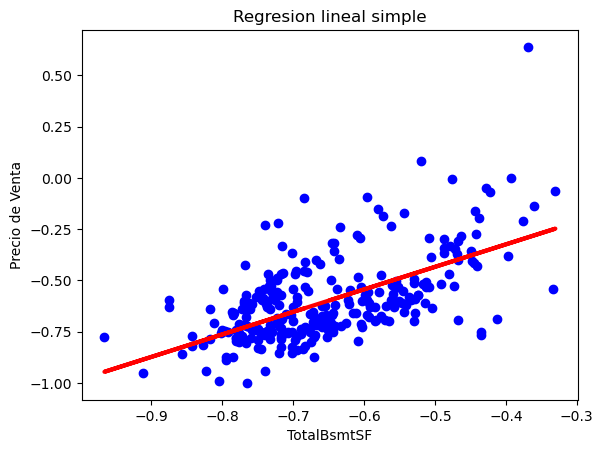

In [79]:
plt.scatter(X_val, y_val, color='blue')
plt.plot(X_val, y_pred, color='red', linewidth=3)
plt.title('Regresion lineal simple')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Precio de Venta')
plt.show()

In [98]:

print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "TotalBsmtSF":', lr.coef_[0])
print('Valor de la pendiente o coeficiente "OverallQual":', lr.coef_[1])
print('Valor de la intersección o coeficiente "b":', lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y =', lr.intercept_,'+',lr.coef_[0],'TotalBsmtSF','+',lr.coef_[1],'OverallQual')




DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "TotalBsmtSF": 0.36152477482132783
Valor de la pendiente o coeficiente "OverallQual": 0.46560228399352
Valor de la intersección o coeficiente "b": -0.42120861572832813

La ecuación del modelo es igual a:
y = -0.42120861572832813 + 0.36152477482132783 TotalBsmtSF + 0.46560228399352 OverallQual


### Métricas

In [93]:
print('Raíz del error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coeficiente de determinación; %.2f' % r2_score(y_val, y_pred))

Raíz del error cuadrático medio: 0.11
Coeficiente de determinación; 0.73


### Predicción de datos futuros

In [94]:
y_pred = lr.predict(X_test)

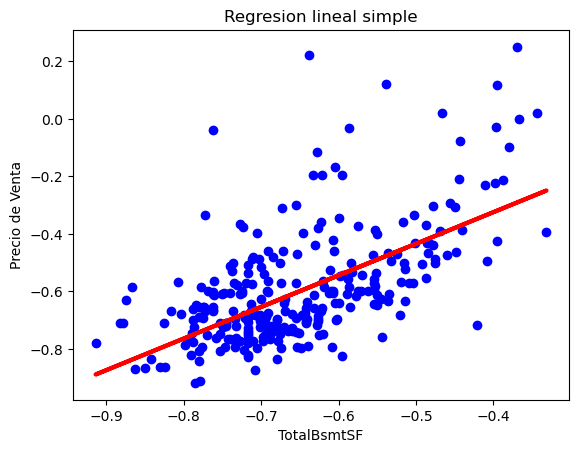

In [82]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Regresion lineal simple')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Precio de Venta')
plt.show()

In [95]:
print('Raíz del error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación; %.2f' % r2_score(y_test, y_pred))

Raíz del error cuadrático medio: 0.13
Coeficiente de determinación; 0.71


### Conclusión

Para la limpieza de los datos, se han realizado las acciones siguientes:
- Se han separado las columnas en numericas y no numericas para poder normalizar los datos.
- Con el DF de las no numericas, se ha realizado un bucle para detectar el porcentaje de datos repetidos y nulos, y así eliminar esas columnas. Con el resultado de esa eliminación, se ha realizado un One-hot Encoding para numerar todas aquellas variables de texto.
Para la realización del modelo, se han realizado las acciones siguientes:
- Se han normalizado los datos.
- Se han estudiado la correlaciones que tienen las variables entre ellas gracias al mapa de calor.
- Una vez realizado el estudio, se ha elegido la variable 'TotalBsmtSF' y se ha visualizado.
- Al visualizarla, la variable contaba con algunos elementos atípicos que se han eliminado.
- Se han separado las cantidades que perteneceran al entrenamiento, la prueba y el test.
- Se ha creado el modelo de regresión lineal y se le han dado los datos de entrenamiento. Una vez entrenado el modelo, se han validado los resultados para comprobar el grado de fiablidad del modelo. En la tabla de visualizacíón, los datos no se muestran demasiado agrupados, por lo que no dará un porcentaje de fiabilidad alto.
- Se ha calculado la formula del modelo, error cuadrático y el coeficiente de determinación, y efectivamente, me han dado unos valores muy bajos. Después se han validado con las datos para el test y se ha comprobado que no era fiable.
- Se han realizado algunos intentos más hasta que se ha conseguido encontrar dos variables que llegaran al 0.71, porcentaje con el que ya nos aproximariamos a una fiabilidad buena, pero no representativa.